In [2]:
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
import numpy as np

data = np.zeros((300,200), dtype=np.float32)
img = afwImage.ImageF(data)
afwDisplay.getDisplay().mtv(img)

In [3]:
# setting up butlers and getting data from each
from lsst.daf.persistence import Butler

b = Butler("/home/sspiehl/demo/rerun/demo1")   
calexp = b.get("calexp", visit=243433, ccdnum=4, immediate=True)
src = b.get("src", visit=243433, ccdnum=4, immediate=True)

In [4]:
# displaying the calexp image data in local machine ds9
masked_calexp = calexp.getMaskedImage()
calexp_img_arr, calexp_mask_arr, calexp_var_arr = masked_calexp.getArrays()
calexp_img = afwImage.ImageF(calexp_img_arr)
afwDisplay.getDisplay().mtv(calexp_img)

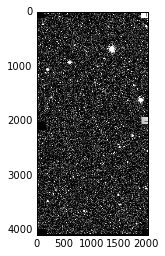

In [4]:
# checking that it displays the same thing as with matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(calexp_img_arr, vmin=0, vmax=100, cmap='gray')

In [5]:
# displaying mask data in local machine ds9
calexp_mask_arr = np.float32(calexp_mask_arr); # ImageF member function requires array of dtype float32
calexp_mask = afwImage.ImageF(calexp_mask_arr);
afwDisplay.getDisplay().mtv(calexp_mask);

In [6]:
# displaying var data in local machine ds9
calexp_var = afwImage.ImageF(calexp_var_arr);
afwDisplay.getDisplay().mtv(calexp_var);

In [7]:
# displaying the src data in local machine ds9
masked_src = src.getTable()
type(masked_src)
#src_img_arr, src_mask_arr, src_var_arr = masked_src.getArrays()
#src_img = afwImage.ImageF(src_img_arr)
#afwDisplay.getDisplay().mtv(src_img)

lsst.afw.table.tableLib.SourceTable

(0, 2048)

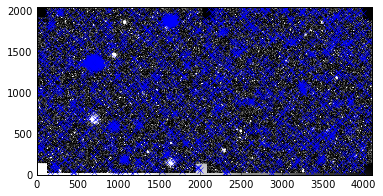

In [8]:
# using the wcs data
wcs = calexp.getWcs();

s = src[0]
#print s.getCoord()
wcs.skyToPixel(s.getCoord())
#print wcs.pixelToSky(0,0)
#print wcs.pixelToSky(img.getWidth()/2, img.getHeight()/2)

plt.imshow(np.rot90(calexp_img_arr), vmin=0, vmax=100, cmap='gray')
for source in src:
    point = wcs.skyToPixel(source.getCoord())
    plt.plot(point.getY(), point.getX(), 'bx')
plt.xlim(0, calexp.getHeight())
plt.ylim(0, calexp.getWidth()) # pretty sure this mirrors it vertically from the print out
# so the source map does not line up exactly with the calexp image